In [2]:
import numpy as np
import cv2
import os
import tensorflow as tf
import keras
from keras.layers import Conv2D, Flatten, BatchNormalization, Dense, MaxPooling2D,Dropout
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import os


In [7]:
import os
from PIL import Image

# Define the directory containing your images
dataset_dir = r"D:\dl project\chest_xray\chest_xray\train"

# Initialize a list to store loaded images
images = []

# Iterate through each file in the directory
for filename in os.listdir(dataset_dir):
    # Check if the file is an image
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image using PIL
        img = Image.open(os.path.join(dataset_dir, filename))
        # Append the loaded image to the list
        images.append(img)

# List subfolders within the dataset directory
sub_folders = [folder for folder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, folder))]
print(len(sub_folders))

# Now you have a list 'images' containing all the loaded images from your dataset directory
# and a list 'sub_folders' containing subfolders within the dataset directory


2


In [8]:
images = []
labels = []

In [9]:
import os
from PIL import Image

# Define the directory containing your images
dataset_dir = r"D:\dl project\chest_xray\chest_xray\train"

# List subfolders within the dataset directory
sub_folders = [folder for folder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, folder))]

# Iterate through each subfolder
for sub_folder in sub_folders:
    # Construct the path to the current subfolder
    sub_folder_path = os.path.join(dataset_dir, sub_folder)
    
    # Listing all the images in the sub_folder
    sub_folder_images = os.listdir(sub_folder_path)
    
    for image_name in sub_folder_images:
        # Constructing the path of the current image
        image_path = os.path.join(sub_folder_path, image_name)
        
        # Check if the file is an image based on the file extension
        if image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            try:
                # Load the image using PIL
                img = Image.open(image_path)
                
                # Process the image as needed (e.g., display, analyze, etc.)
                # Here you can perform operations on 'img' such as resizing, converting to numpy array, etc.
                
                # For example, to display the image
                img.show()
            except (IOError, OSError, ValueError) as e:
                print(f"Error loading image {image_path}: {e}")


In [10]:
images = np.array(images)
labels = np.array(labels)

In [13]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Define the directory containing your images
dataset_dir = r"D:\dl project\chest_xray\chest_xray\train"

# Initialize lists to store loaded images and labels
images = []
labels = []

# List subfolders within the dataset directory
sub_folders = [folder for folder in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, folder))]

# Iterate through each subfolder
for sub_folder in sub_folders:
    # Construct the path to the current subfolder
    sub_folder_path = os.path.join(dataset_dir, sub_folder)
    
    # Listing all the images in the sub_folder
    sub_folder_images = os.listdir(sub_folder_path)
    
    for image_name in sub_folder_images:
        # Constructing the path of the current image
        image_path = os.path.join(sub_folder_path, image_name)
        
        # Check if the file is an image based on the file extension
        if image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            try:
                # Load the image using PIL
                img = Image.open(image_path)
                
                # Append the loaded image to the images list
                images.append(img)
                
                # Append the label (subfolder name) to the labels list
                labels.append(sub_folder)
            except (IOError, OSError, ValueError) as e:
                print(f"Error loading image {image_path}: {e}")

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Define a preprocessing function
def preprocessing(img):
    img_array = np.array(img)  # Convert PIL Image to NumPy array
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array



In [15]:
sample_input = X_train[0]  # Assuming X_train is a list of images
sample_output = preprocessing(sample_input)
print(sample_output.shape)  # Check the shape of the output for a sample input

(1326, 1790)


In [27]:
def preprocessing(image):
    # Check if the image is already a NumPy array
    if not isinstance(image, np.ndarray):
        # Convert the image to a NumPy array if it's not already
        image = np.array(image)
    
    # Perform preprocessing steps on the image
    resized_image = cv2.resize(image, (256, 256))  # Resize all images to the same size
    
    # Check if the image is grayscale (single channel)
    if len(resized_image.shape) == 2:
        # Convert grayscale image to RGB by duplicating the single channel
        resized_image = np.stack((resized_image,) * 3, axis=-1)
    
    # Check the shape after resizing
    if resized_image.shape != (256, 256, 3):
        raise ValueError(f"Resized image has unexpected shape: {resized_image.shape}. Expected: (256, 256, 3)")
    
    # Add other preprocessing steps here
    
    return resized_image

# Apply preprocessing to all images in X_train, X_val, and X_test
X_train = np.array([preprocessing(img) for img in X_train])
X_val = np.array([preprocessing(img) for img in X_val])
X_test = np.array([preprocessing(img) for img in X_test])


In [28]:
data_gen = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    rotation_range = 10,
    shear_range = 0.1
    )

In [30]:
# Label Encoder
label_encoder = LabelEncoder()
label_encoder.fit(labels)


LabelEncoder()

In [31]:
y_train = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

In [33]:
# Number of Classes
num_classes = len(label_encoder.classes_)

In [34]:
from keras.utils import to_categorical

In [35]:
# Converting the labels into One-Hot encoding
y_train = to_categorical(y_train, num_classes = num_classes)
y_val = to_categorical(y_val, num_classes = num_classes)
y_test = to_categorical(y_test, num_classes = num_classes)

In [38]:
def build_model():
    model = Sequential()
    
    model.add(Conv2D(32, (5,5), strides=(1,1), padding='same', activation='relu', input_shape=(256, 256, 3)))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(64, (3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(128, (3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(256, (3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(512, (3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    model.add(Conv2D(32, (3,3), strides=(1,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(num_classes, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [39]:
model = build_model()

print(model.summary())



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 64)       

In [41]:
history = model.fit(data_gen.flow(X_train, y_train, batch_size = 32),
                   validation_data = (X_val, y_val),
                   epochs = 50,
                   verbose = 2)

Epoch 1/50
2/2 - 3s - loss: 2.2489 - accuracy: 0.5510 - val_loss: 0.6931 - val_accuracy: 0.6667 - 3s/epoch - 1s/step
Epoch 2/50
2/2 - 3s - loss: 2.9240 - accuracy: 0.4286 - val_loss: 0.6931 - val_accuracy: 0.6667 - 3s/epoch - 1s/step
Epoch 3/50
2/2 - 3s - loss: 1.7370 - accuracy: 0.5306 - val_loss: 0.6931 - val_accuracy: 0.6667 - 3s/epoch - 1s/step
Epoch 4/50
2/2 - 3s - loss: 1.8197 - accuracy: 0.4694 - val_loss: 0.6932 - val_accuracy: 0.3333 - 3s/epoch - 1s/step
Epoch 5/50
2/2 - 3s - loss: 1.8381 - accuracy: 0.5714 - val_loss: 0.6932 - val_accuracy: 0.3333 - 3s/epoch - 1s/step
Epoch 6/50
2/2 - 3s - loss: 2.0694 - accuracy: 0.4898 - val_loss: 0.6932 - val_accuracy: 0.3333 - 3s/epoch - 1s/step
Epoch 7/50
2/2 - 3s - loss: 2.2863 - accuracy: 0.3673 - val_loss: 0.6932 - val_accuracy: 0.3333 - 3s/epoch - 1s/step
Epoch 8/50
2/2 - 3s - loss: 1.8085 - accuracy: 0.5102 - val_loss: 0.6932 - val_accuracy: 0.3333 - 3s/epoch - 1s/step
Epoch 9/50
2/2 - 3s - loss: 1.2177 - accuracy: 0.5714 - val_loss

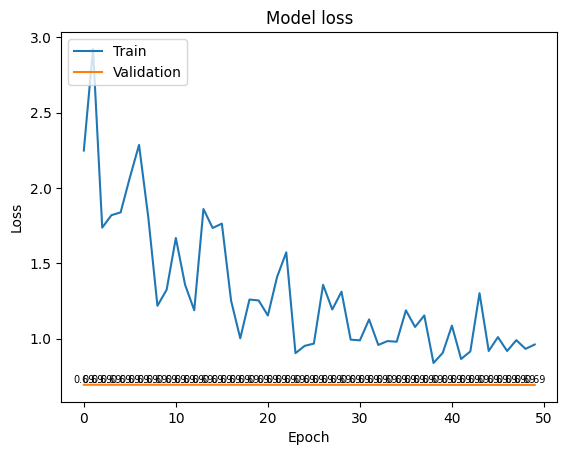

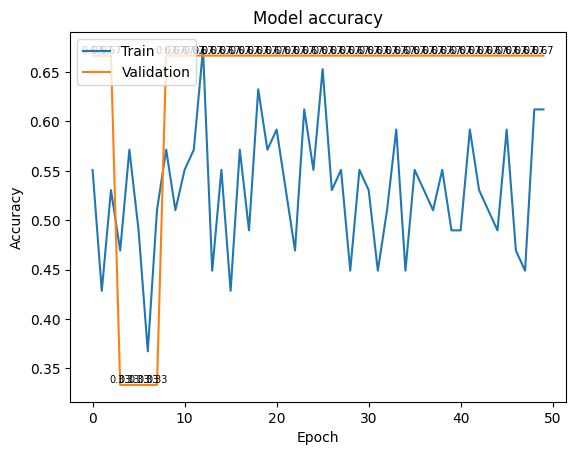

In [42]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    for i, loss in enumerate(history.history['val_loss']):
        plt.text(i, loss, f'{loss:.2f}', ha='center', va='bottom', fontsize=7)

    plt.show()

    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    for i, acc in enumerate(history.history['val_accuracy']):
        plt.text(i, acc, f'{acc:.2f}', ha='center', va='bottom', fontsize=7)

    plt.show()

plot_loss_accuracy(history)

In [43]:
model.save('model.h5')

c:\Users\shyam\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 1s/step


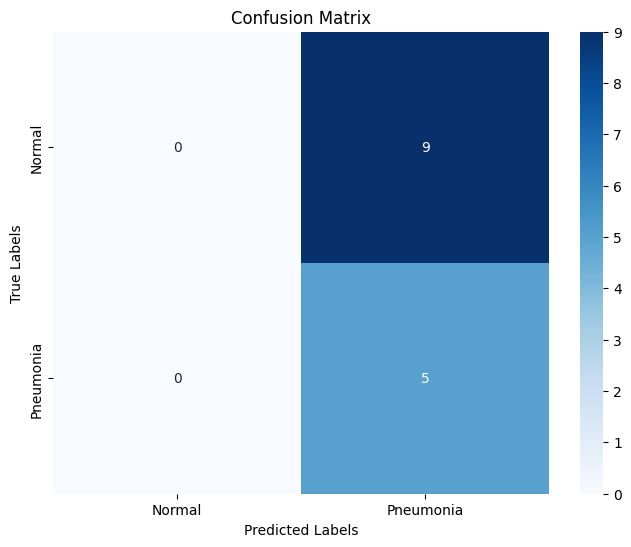

In [44]:
# Predicting labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Converting one-hot encoded test labels back to categorical labels
y_true = np.argmax(y_test, axis=1)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Pneumonia'], yticklabels=['Normal', 'Pneumonia'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.36
Precision: 0.36
Recall: 1.00
F1 Score: 0.53
AUC: 0.50


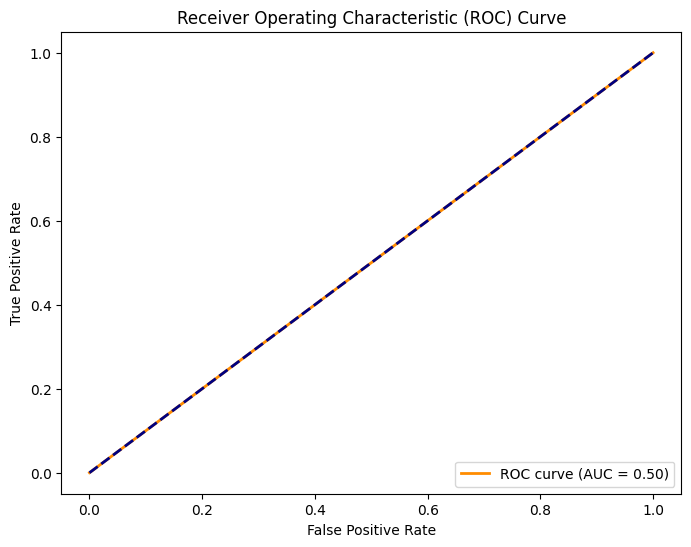

In [45]:
accuracy = accuracy_score(y_true, y_pred_classes)

# Precision
precision = precision_score(y_true, y_pred_classes)

# Recall
recall = recall_score(y_true, y_pred_classes)

# F1 Score
f1 = f1_score(y_true, y_pred_classes)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_classes)
roc_auc = auc(fpr, tpr)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {roc_auc:.2f}")

# Visualization of ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()